In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import pandas as pd   # <-- you missed this
from google.colab import files
import io

# Upload dataset
uploaded = files.upload()   # Choose floods.csv
filename = list(uploaded.keys())[0]

# Read CSV with encoding fix
df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1')

print("Loaded file:", filename)
print("Shape:", df.shape)

# Show first rows
df.head()


Saving floods.csv to floods (3).csv
Loaded file: floods (3).csv
Shape: (19, 7)


,year,month,date,location,cause,deaths,property damages
0,1992,sep,7.0,"Azad Kashmir,Punjab,Jammu and Kashmir,North-We...","Heavy rain,Landslide,Severe weather","2,500",NaN
1,1995,july,NaN,NaN,"Heavy rain,Severe weather(River Indus started ...",NaN,NaN
2,2003,july,22.0,Sindh,Heavy monsoon rainfall,484,"4,476 villages affected"
3,2007,july-aug,NaN,Khyber-Pakhtunkhwa,"Heavy rainfall,melting of glaciers",152,NaN
4,2009,july-aug,NaN,Sindh(Karachi),Heavy rainfall,26,NaN


In [ ]:
print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns)

# 1) .info()
print("\n--- df.info() ---")
print(df.info())

# 2) .describe()
print("\n--- df.describe() ---")
print(df.describe(include='all'))

# 3) missing values check
print("\n--- Missing values per column ---")
print(df.isnull().sum())

# Extras
print("\n--- First 5 rows ---")
display(df.head())

print("\n--- Duplicate rows count ---")
print(df.duplicated().sum())

Shape (rows, cols): (19, 7)

Columns:
 Index(['year', 'month', 'date', 'location', 'cause', 'deaths',
       'property damages'],
      dtype='object')

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              19 non-null     int64  
 1   month             19 non-null     object 
 2   date              13 non-null     float64
 3   location          18 non-null     object 
 4   cause             19 non-null     object 
 5   deaths            17 non-null     object 
 6   property damages  11 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB
None

--- df.describe() ---
               year month       date        location                cause  \
count     19.000000    19  13.000000              18                   19   
unique          NaN     9        NaN              16        

,year,month,date,location,cause,deaths,property damages
0,1992,sep,7.0,"Azad Kashmir,Punjab,Jammu and Kashmir,North-We...","Heavy rain,Landslide,Severe weather","2,500",NaN
1,1995,july,NaN,NaN,"Heavy rain,Severe weather(River Indus started ...",NaN,NaN
2,2003,july,22.0,Sindh,Heavy monsoon rainfall,484,"4,476 villages affected"
3,2007,july-aug,NaN,Khyber-Pakhtunkhwa,"Heavy rainfall,melting of glaciers",152,NaN
4,2009,july-aug,NaN,Sindh(Karachi),Heavy rainfall,26,NaN



--- Duplicate rows count ---
0


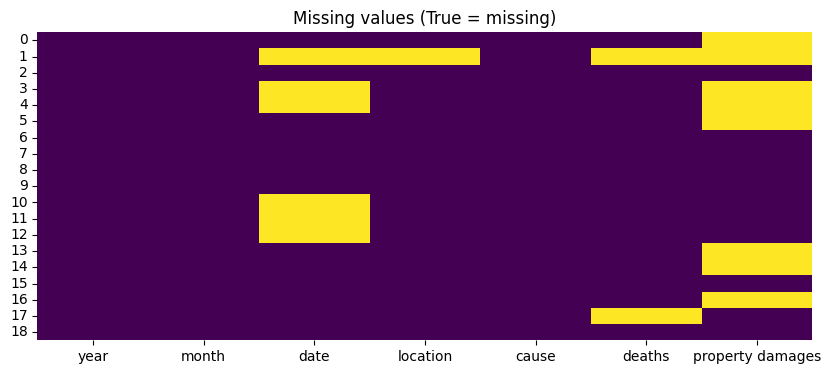

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing values (True = missing)')
plt.show()

# Example histogram (change 'Year' or numeric column as per dataset)
if 'Year' in df.columns:
    df['Year'].hist(bins=30)
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title("Floods by Year")
    plt.show()

In [7]:
# Step 0: Imports
import io, re, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline


In [8]:
# WEEK 2 – Cell 1: Imports
import io, re, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

plt.rcParams["figure.figsize"] = (8,4)
pd.set_option("display.max_columns", 100)


In [9]:
# WEEK 2 – Cell 2: Load floods.csv (handles non-UTF8 encodings)
from google.colab import files

uploaded = files.upload()     # choose floods.csv
fname = list(uploaded.keys())[0]

def read_csv_robust(b):
    for enc in ["utf-8", "latin1", "ISO-8859-1", "cp1252"]:
        try:
            return pd.read_csv(io.BytesIO(b), encoding=enc)
        except Exception as e:
            last = e
    raise last

df = read_csv_robust(uploaded[fname])
print("Loaded:", fname, "| Shape:", df.shape)
df.head()


Saving floods.csv to floods (4).csv
Loaded: floods (4).csv | Shape: (19, 7)


,year,month,date,location,cause,deaths,property damages
0,1992,sep,7.0,"Azad Kashmir,Punjab,Jammu and Kashmir,North-We...","Heavy rain,Landslide,Severe weather","2,500",NaN
1,1995,july,NaN,NaN,"Heavy rain,Severe weather(River Indus started ...",NaN,NaN
2,2003,july,22.0,Sindh,Heavy monsoon rainfall,484,"4,476 villages affected"
3,2007,july-aug,NaN,Khyber-Pakhtunkhwa,"Heavy rainfall,melting of glaciers",152,NaN
4,2009,july-aug,NaN,Sindh(Karachi),Heavy rainfall,26,NaN


In [11]:
print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns)

# 1) .info()
print("\n--- df.info() ---")
print(df.info())

# 2) .describe()
print("\n--- df.describe(include='all') ---")
display(df.describe(include='all'))   # fixed

# 3) missing values check .isnull().sum()
print("\n--- Missing values per column ---")
print(df.isnull().sum())

# Extras helpful:
print("\n--- First 5 rows ---")
display(df.head())

print("\n--- Duplicate rows count ---")
print(df.duplicated().sum())


Shape (rows, cols): (19, 7)

Columns:
 Index(['year', 'month', 'date', 'location', 'cause', 'deaths',
       'property damages'],
      dtype='object')

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              19 non-null     int64  
 1   month             19 non-null     object 
 2   date              13 non-null     float64
 3   location          18 non-null     object 
 4   cause             19 non-null     object 
 5   deaths            17 non-null     object 
 6   property damages  11 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB
None

--- df.describe(include='all') ---


,year,month,date,location,cause,deaths,property damages
count,19.000000,19,13.000000,18,19,17,11
unique,NaN,9,NaN,16,10,17,11
top,NaN,july,NaN,Sindh(Karachi),Heavy monsoon rains,"2,500","4,476 villages affected"
freq,NaN,5,NaN,3,8,1,1
mean,2012.105263,NaN,15.615385,NaN,NaN,NaN,NaN
std,8.198203,NaN,9.708574,NaN,NaN,NaN,NaN
min,1992.000000,NaN,2.000000,NaN,NaN,NaN,NaN
25%,2009.500000,NaN,7.000000,NaN,NaN,NaN,NaN
50%,2014.000000,NaN,14.000000,NaN,NaN,NaN,NaN
75%,2017.500000,NaN,25.000000,NaN,NaN,NaN,NaN



--- Missing values per column ---
year                0
month               0
date                6
location            1
cause               0
deaths              2
property damages    8
dtype: int64

--- First 5 rows ---


,year,month,date,location,cause,deaths,property damages
0,1992,sep,7.0,"Azad Kashmir,Punjab,Jammu and Kashmir,North-We...","Heavy rain,Landslide,Severe weather","2,500",NaN
1,1995,july,NaN,NaN,"Heavy rain,Severe weather(River Indus started ...",NaN,NaN
2,2003,july,22.0,Sindh,Heavy monsoon rainfall,484,"4,476 villages affected"
3,2007,july-aug,NaN,Khyber-Pakhtunkhwa,"Heavy rainfall,melting of glaciers",152,NaN
4,2009,july-aug,NaN,Sindh(Karachi),Heavy rainfall,26,NaN



--- Duplicate rows count ---
0


In [12]:
# WEEK 2 – Cell 4: Overview of columns & types
overview = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null": df.notnull().sum(),
    "unique": [df[c].nunique(dropna=True) for c in df.columns]
})
display(overview.sort_values(["dtype","unique"]).reset_index().rename(columns={"index":"column"}))


,column,dtype,non_null,unique
0,date,float64,13,12
1,year,int64,19,18
2,month,object,19,9
3,cause,object,19,10
4,property damages,object,11,11
5,location,object,18,16
6,deaths,object,17,17


In [13]:
# WEEK 2 – Cell 5: Clean column names, trim strings, parse dates, drop duplicates

def to_snake(name):
    name = str(name).strip()
    name = re.sub(r"[^\w\s]", " ", name)
    name = re.sub(r"\s+", "_", name)
    return name.lower()

df = df.copy()
df.columns = [to_snake(c) for c in df.columns]

# Trim whitespace for text columns
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

# Try to parse date-like columns; create year/month/day features
parsed = {}
for c in list(df.columns):
    if re.search(r"(date|time|year|month|day)", c):
        dt = pd.to_datetime(df[c], errors="coerce", infer_datetime_format=True)
        if dt.notna().mean() > 0.6:
            df[c] = dt
            df[f"{c}_year"]  = df[c].dt.year
            df[f"{c}_month"] = df[c].dt.month
            df[f"{c}_day"]   = df[c].dt.day
            parsed[c] = True

# Drop perfect duplicates
before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
print("Dropped duplicates:", before - len(df))

print("Parsed date columns:", [k for k,v in parsed.items() if v])
df.head()


Dropped duplicates: 0
Parsed date columns: ['year', 'date']


,year,month,date,location,cause,deaths,property_damages,year_year,year_month,year_day,date_year,date_month,date_day
0,1970-01-01 00:00:00.000001992,sep,1970-01-01 00:00:00.000000007,"Azad Kashmir,Punjab,Jammu and Kashmir,North-We...","Heavy rain,Landslide,Severe weather","2,500",nan,1970,1,1,1970.0,1.0,1.0
1,1970-01-01 00:00:00.000001995,july,NaT,nan,"Heavy rain,Severe weather(River Indus started ...",nan,nan,1970,1,1,NaN,NaN,NaN
2,1970-01-01 00:00:00.000002003,july,1970-01-01 00:00:00.000000022,Sindh,Heavy monsoon rainfall,484,"4,476 villages affected",1970,1,1,1970.0,1.0,1.0
3,1970-01-01 00:00:00.000002007,july-aug,NaT,Khyber-Pakhtunkhwa,"Heavy rainfall,melting of glaciers",152,nan,1970,1,1,NaN,NaN,NaN
4,1970-01-01 00:00:00.000002009,july-aug,NaT,Sindh(Karachi),Heavy rainfall,26,nan,1970,1,1,NaN,NaN,NaN


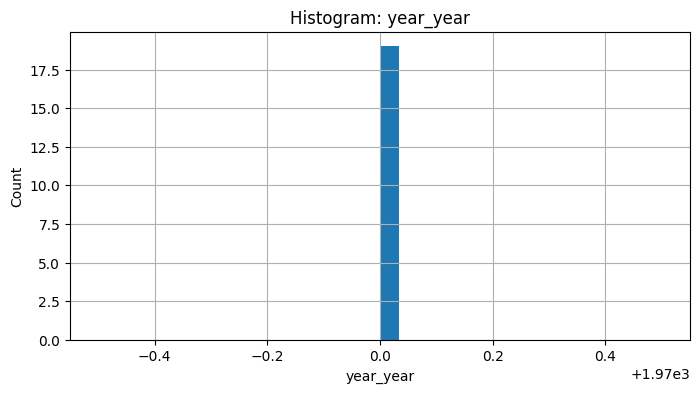

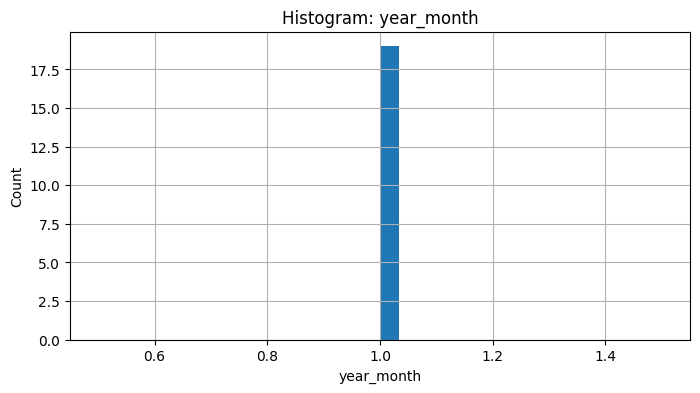

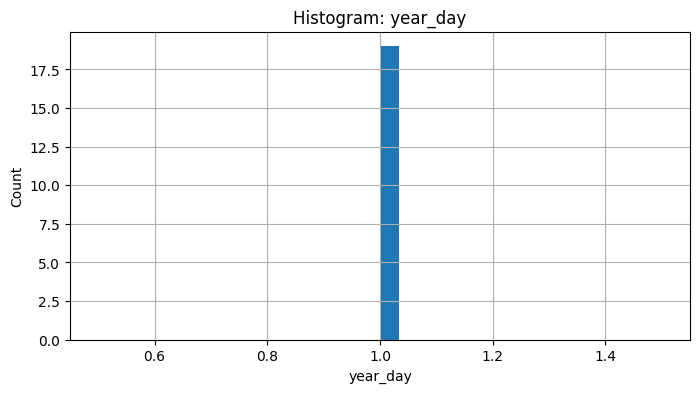

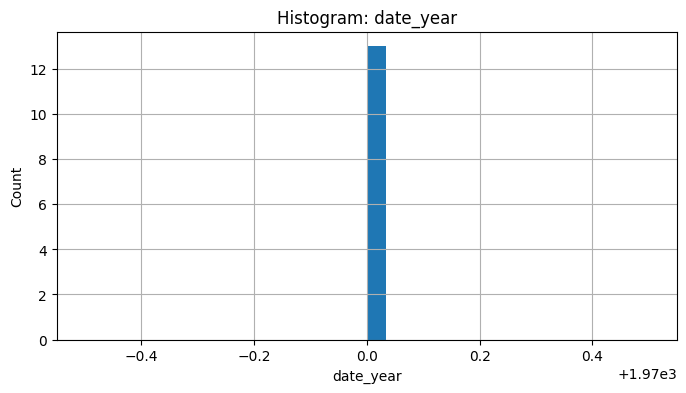

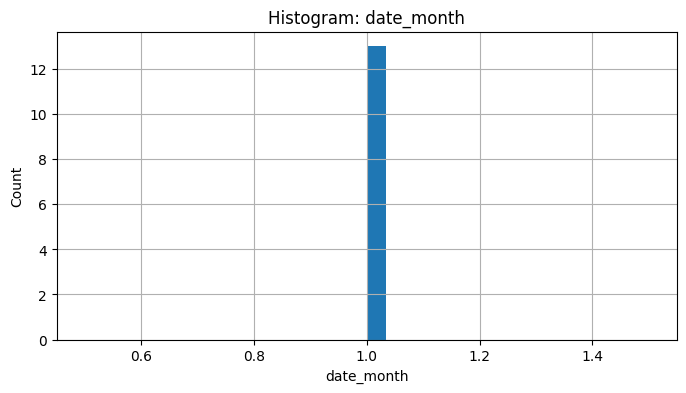

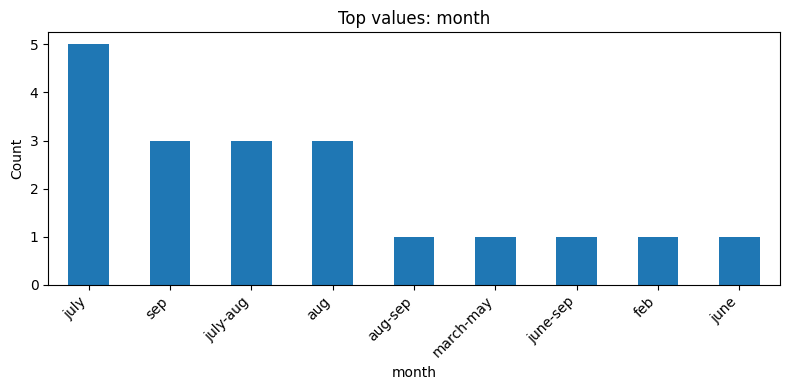

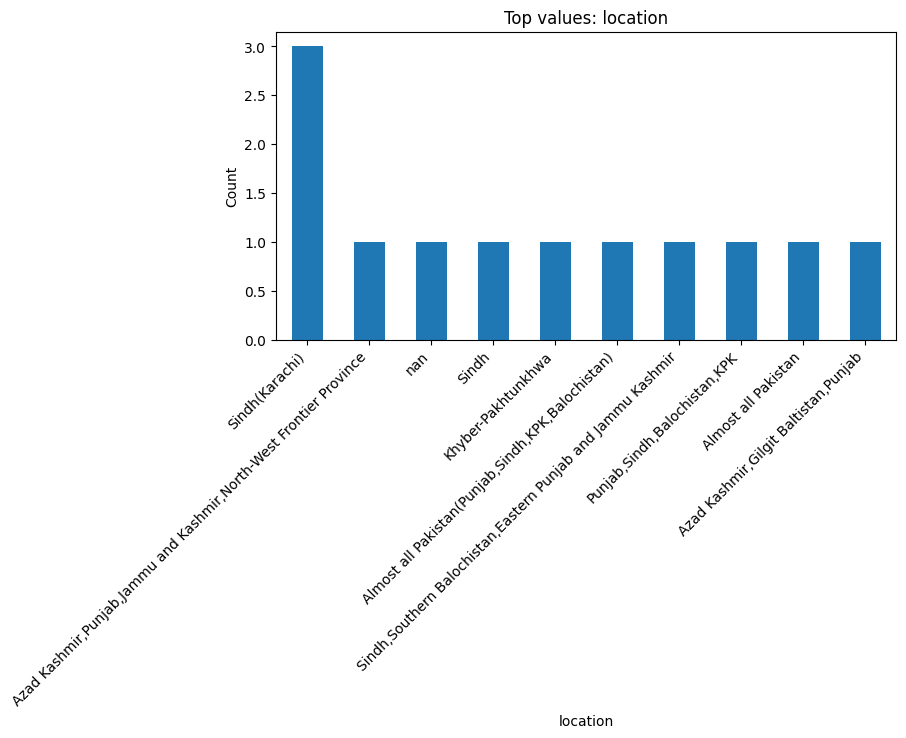

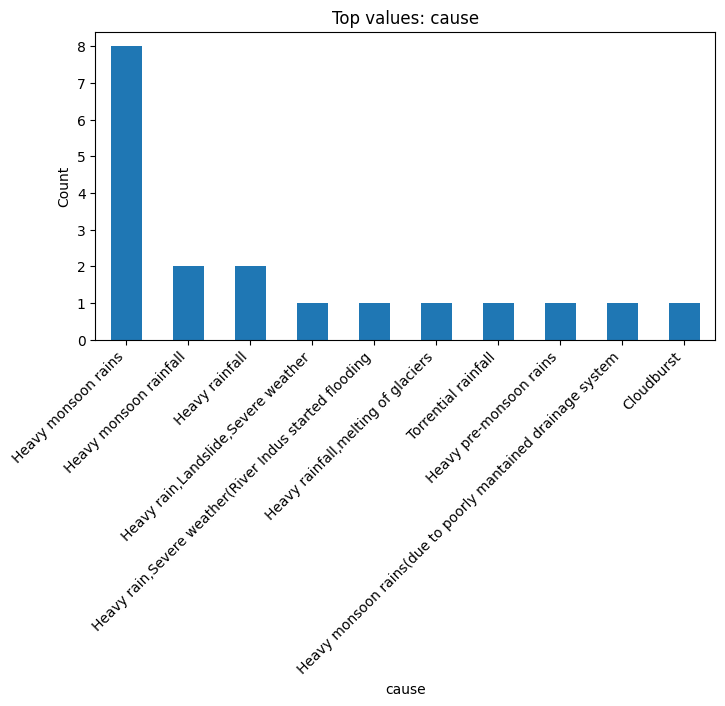

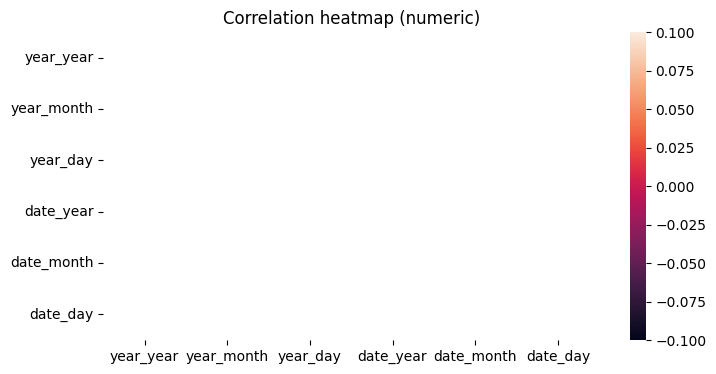

In [14]:
# WEEK 2 – Cell 6: Visual EDA

# 1) Histograms for first 5 numeric columns
num_cols = list(df.select_dtypes(include=np.number).columns)[:5]
for c in num_cols:
    df[c].hist(bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.show()

# 2) Top categories for first 3 object columns
cat_cols = list(df.select_dtypes(include="object").columns)[:3]
for c in cat_cols:
    df[c].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top values: {c}")
    plt.xlabel(c); plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 3) Correlation heatmap (numeric only)
if len(num_cols) >= 2:
    sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False)
    plt.title("Correlation heatmap (numeric)")
    plt.show()


In [22]:
# WEEK 2 – Cell 7: Pick a target (edit TARGET_NAME if you already know)

TARGET_NAME = None   # <-- If you know the target column, put its name here (string), e.g., "fatalities"

def auto_guess_target(df):
    skip = {"id","code","lat","lon","latitude","longitude"}
    candidates = [c for c in df.select_dtypes(include=np.number).columns
                  if not any(k in c for k in skip)
                  and not c.endswith(("_year","_month","_day"))
                  and df[c].nunique(dropna=True) > 1]
    if not candidates:
        return None, None
    best, score = None, -1
    for c in candidates:
        s = float(df[c].var(skipna=True) or 0) + df[c].nunique(dropna=True)
        if s > score:
            score, best = s, c
    task = "classification" if df[best].nunique(dropna=True) <= 12 else "regression"
    return best, task

if TARGET_NAME is None:
    target_col, task_type = auto_guess_target(df)
else:
    target_col = TARGET_NAME
    task_type = "classification" if df[target_col].nunique(dropna=True) <= 12 else "regression"

print("✅ Target chosen:", target_col, "| Task:", task_type)


✅ Target chosen: deaths | Task: regression


In [23]:
# WEEK 2 – Cell 8: Split features/target and preprocessing

assert target_col is not None, "Please set a valid TARGET_NAME in Cell 7."

X = df.drop(columns=[target_col])
y = df[target_col]

# Separate column types
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# Preprocessing pipelines
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split: Train =", X_train.shape, "| Test =", X_test.shape)


Numeric features: ['year_year', 'year_month', 'year_day', 'date_year', 'date_month', 'date_day']
Categorical features: ['month', 'location', 'cause', 'property_damages']
✅ Data split: Train = (15, 12) | Test = (4, 12)


In [25]:
# WEEK 2 – Cell 9: Train baseline models (fixed for NaN in y)

# Drop rows where target is NaN
mask = y_train.notna()
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

mask_test = y_test.notna()
X_test_clean = X_test[mask_test]
y_test_clean = y_test[mask_test]

if task_type == "regression":
    model = Pipeline([
        ("prep", preprocessor),
        ("fs", SelectKBest(score_func=f_regression, k="all")),
        ("clf", RandomForestRegressor(n_estimators=200, random_state=42))
    ])
else:
    model = Pipeline([
        ("prep", preprocessor),
        ("fs", SelectKBest(score_func=mutual_info_classif, k="all")),
        ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
    ])

model.fit(X_train_clean, y_train_clean)
print("✅ Model trained:", model.named_steps["clf"].__class__.__name__)



✅ Model trained: RandomForestRegressor


In [28]:
# WEEK 2 – Cell 10: Evaluate model (compatible sklearn)

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import numpy as np

y_pred = model.predict(X_test_clean)

if task_type == "regression":
    mse = mean_squared_error(y_test_clean, y_pred)
    rmse = np.sqrt(mse)   # manual RMSE
    r2 = r2_score(y_test_clean, y_pred)
    print(f"✅ Regression results: RMSE={rmse:.2f}, R²={r2:.2f}")
else:
    acc = accuracy_score(y_test_clean, y_pred)
    print(f"✅ Classification results: Accuracy={acc:.2%}")
    print("\nClassification report:\n", classification_report(y_test_clean, y_pred))


✅ Regression results: RMSE=116.25, R²=nan


In [29]:
# WEEK 2 – Cell 11: Save outputs for submission

from google.colab import files

# 1. Save the cleaned dataset
df.to_csv("floods_clean.csv", index=False)

# 2. Save model predictions alongside actual values
results = pd.DataFrame({
    "y_test": y_test_clean,
    "y_pred": y_pred
})
results.to_csv("floods_predictions.csv", index=False)

# 3. Download files locally (optional in Colab)
files.download("floods_clean.csv")
files.download("floods_predictions.csv")

print("✅ Files saved: floods_clean.csv & floods_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Files saved: floods_clean.csv & floods_predictions.csv
